<a href="https://colab.research.google.com/github/IamGuts/data_science/blob/main/Mooshroom_clasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация грибов на съедобные или нет

##Загрузка необходимый библиотек для работы

In [2]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
files.upload()

## Обработка данных

In [10]:
data = pd.read_csv('mushroom_cleaned.csv.zip')

In [11]:
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [12]:
print(f'информация :\n{data.info()}\nСумма пропусков :\n{data.isna().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB
информация :
None
Сумма пропусков :
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


## Визуализация распределения данных

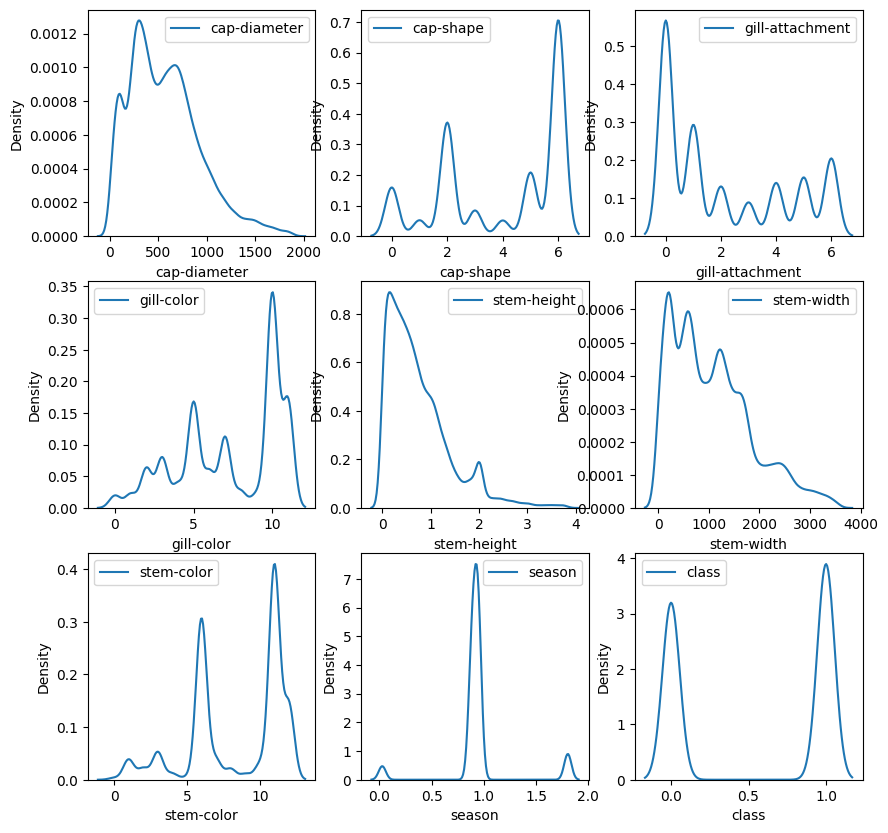

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
c = 1
for dt in data:
    plt.subplot(3,3,c)
    c += 1
    sns.kdeplot(data[dt], label=dt)
    plt.legend()
plt.show()

## Визуализация корреляции данных

<Axes: >

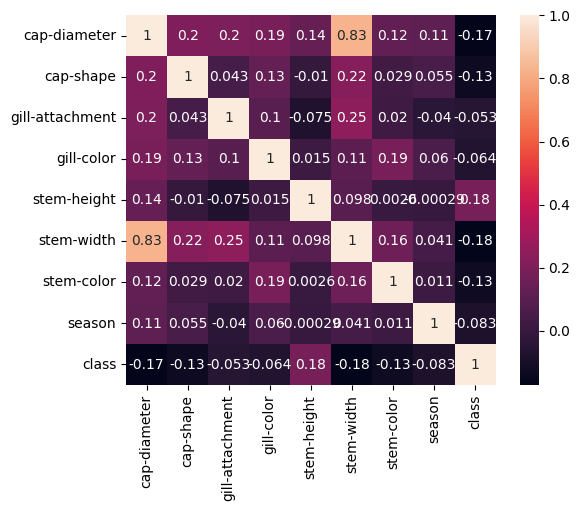

In [14]:
sns.heatmap(
            data= data.corr(),
            vmin=None,
            vmax=None,
            cmap=None,
            center=None,
            robust=True,
            annot=True,
            fmt='.2g',
            annot_kws=None,

            linecolor='white',
            cbar=True,
            cbar_kws=None,
            cbar_ax=None,
            square=True,
            xticklabels='auto',
            yticklabels='auto',
            mask=None,
            ax=None
)

## KNn

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_absolute_error, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

In [16]:

X = data.drop(['class', 'cap-diameter'], axis=1)
y = data['class']


# Бинаризация меток классов

In [17]:

y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Разделение данных на обучающую и тестовую выборки

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Создание пайплайна

In [19]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Модель KNN
])

# Обучение модели

In [20]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# Оценка модели

In [21]:
accuracy = pipeline.score(X_test, y_test)
y_pred = pipeline.predict(X_test)
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_pred, y_test):.4g}')
print(f'Точность: {accuracy:.4f}')

Средняя абсолютная ошибка: 0.01462
Точность: 0.9854


# Построение матрицы ошибок

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок

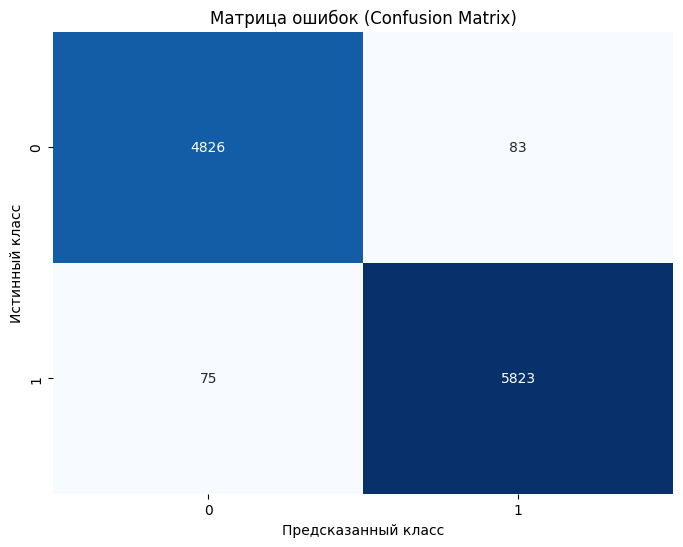

In [23]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

# Визуализация распределения классов

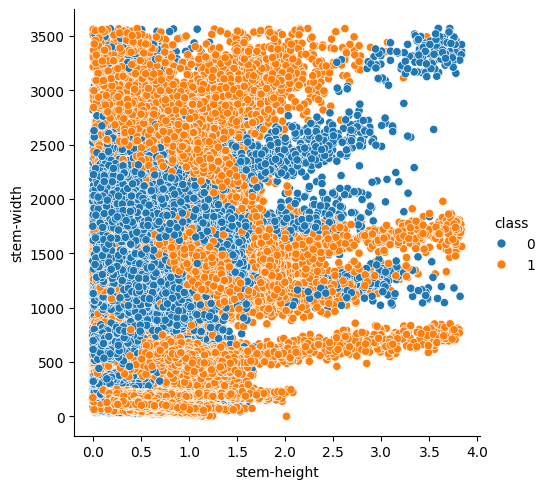

In [24]:
sns.relplot(data=data, x='stem-height',y='stem-width', hue='class')

## РОС кривые

# Получение вероятностей предсказания для ROC

In [25]:

y_score = pipeline.predict_proba(X_test)

# Построение графиков ROC для каждого класса

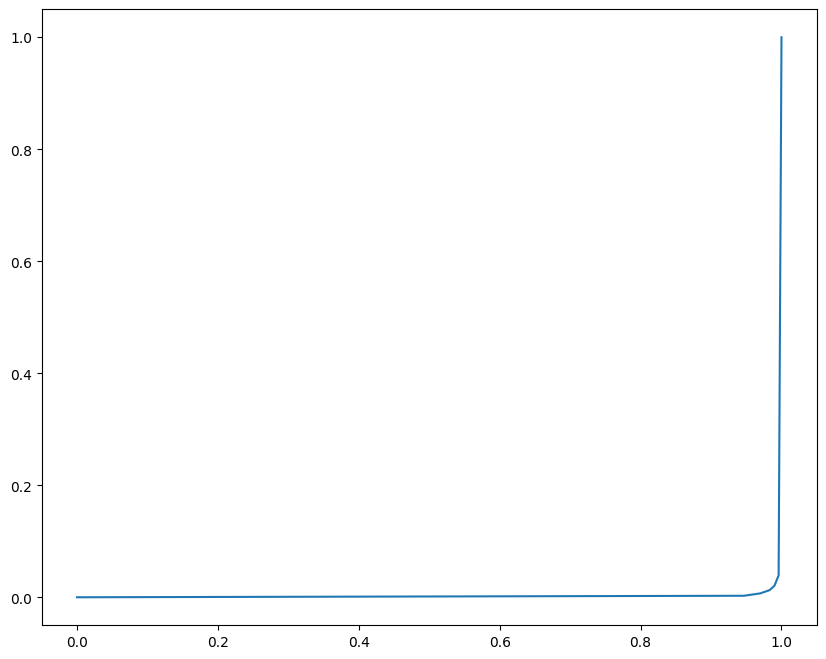

In [26]:


plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Класс {i} (AUC = {roc_auc:.2f})')

# Построение графиков ROC для каждого класса

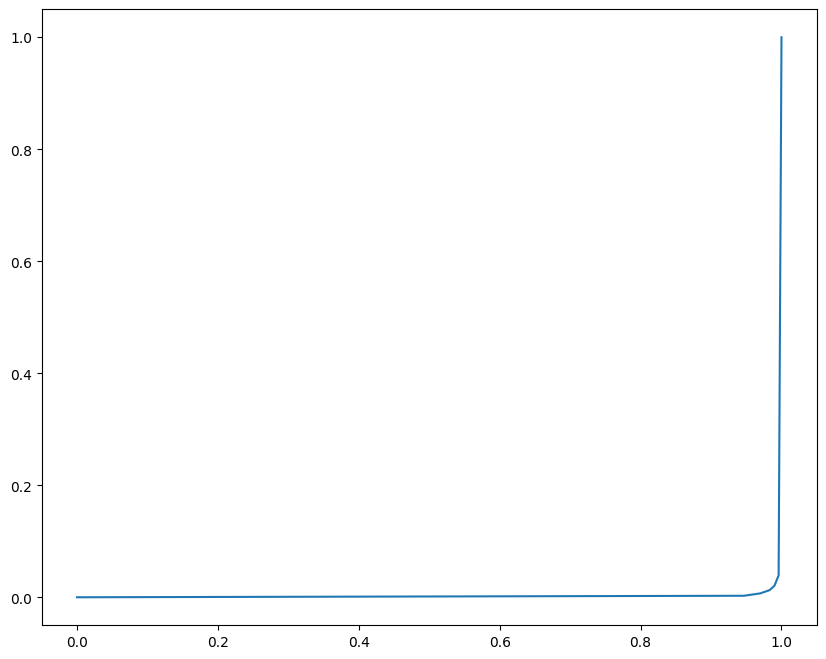

In [27]:
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Класс {i} (AUC = {roc_auc:.2f})')

# Настройка графика

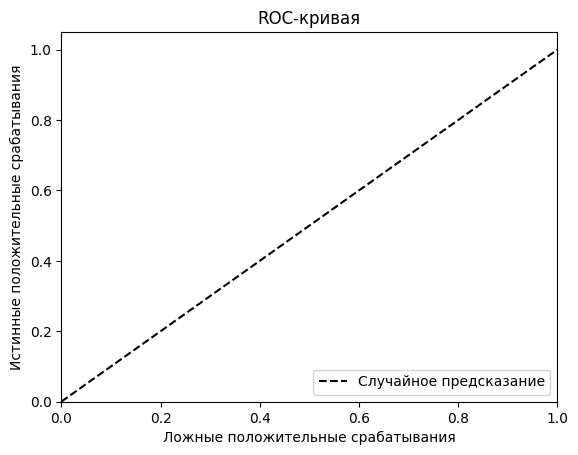

In [28]:
plt.plot([0, 1], [0, 1], 'k--', label='Случайное предсказание')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложные положительные срабатывания')
plt.ylabel('Истинные положительные срабатывания')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()